In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import os
from os.path import join
import pandas as pd
import pickle as pkl
import openai_multi_tool_use_parallel_patch
from auto_analytics.tool_chat_loop import tool_chat_loop,tool_chat_loop_2, shell, tool_chat_loop_2nb, tool_chat_loop_2nb_with_vision
from auto_analytics.supervisor_loop import supervisor_chat_loop_2nb, system_message_library
from auto_analytics.utils.format_utils import message_thread_render
from auto_analytics.utils.nbformat_utils import save_cells_to_nb
from nbformat.v4 import new_notebook, new_code_cell, new_output, new_markdown_cell
from auto_analytics.utils.nbformat_utils import create_code_cell_from_captured, save_cells_to_nb
from auto_analytics.utils.nbformat_utils import convert_notebook_to_html, convert_notebook_to_pdf

report_dir = r"/Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports"

In [3]:
result_dir = join(report_dir, "Diabetes")
os.makedirs(result_dir, exist_ok=True)

In [4]:
nbcells = []
messages = []

In [5]:
csvpath = "/Users/binxuwang/Github/GPT-Auto-Data-Analytics/table_data/Diabetes_Blood_Classification.csv"

In [7]:
table_descriptions = """
This dataset contains clinical data from a number of patients that have been analyzed to examine cardiovascular health and kidney function. This data is important for evaluating the risk of heart disease and diabetes, as well as the impaired kidney function often associated with these conditions.

This dataset was created to support research and development of risk prediction models for heart disease, diabetes and impaired kidney function. With relevant features and clear diagnosis labels, this dataset can be used to build and test accurate prediction models."""
column_descriptions = """
About this file

* Age: Represents the age of the patient in years. Age can be a risk factor for diabetes, as the risk of diabetes increases with age.

* Gender: Indicates the gender of the patient, which can be a factor in the prediction of diabetes. Some studies suggest that women may have a different risk than men in developing diabetes.

* Body Mass Index (BMI): BMI is a measure that uses a person's height and weight to determine whether they are in the normal weight, overweight, or obese category. A high BMI is associated with a higher risk of diabetes.

* Chol: total cholesterol level in the blood. Cholesterol is a fat found in the blood and can come from foods consumed and also be produced by the body. High cholesterol can be a risk factor for heart disease and diabetes.

* TG (Triglycerides): Represents the level of triglycerides in the blood. Triglycerides are a type of fat found in the blood, and high levels can also increase the risk of heart disease and diabetes.

* HDL (High-Density Lipoprotein): Is the "good" cholesterol that helps transport excess cholesterol from body tissues back to the liver for further processing or excretion. High levels of HDL are usually considered good for heart health.

* LDL (Low-Density Lipoprotein): Is the "bad" cholesterol that can cause plaque buildup in the arteries, increasing the risk of heart disease and stroke. High LDL levels can be a risk factor for diabetes.

* Cr (Creatinine): A waste product of muscle metabolism that is excreted from the body through the kidneys. Creatinine levels in the blood can provide information about kidney function. Kidney disease may be linked to the risk of diabetes.

* BUN (Blood Urea Nitrogen): Is a measure used to evaluate kidney and liver function. High levels of BUN may indicate kidney or liver disorders that can be related to diabetes.

* Diagonisis: An indicator that someone has diabetes.
"""

In [8]:
task_objective = """Perform explorative data analysis of this dataset, 
This analyis is poised to uncover relationships among different variables, 
and to find predictive model of diabetes and attribute their importance for prediction.

First, pose potential questions that could be answered by analyzing this dataset
Organize these question by the type of analysis that would be required to answer them.
These questions will be send to data scientist to write code to answer. 
"""

messages, nbcells, cache = supervisor_chat_loop_2nb(f"Here is a dataset, that can be loaded from {csvpath}."\
                            f"the dataset description {table_descriptions}. "\
                            f"and the column desctiption {column_descriptions}.\n"\
                            f"Our objective is to {task_objective}", 
                            model_name="gpt-4-turbo-preview", 
                            MAX_ROUND=1, nbcells=nbcells, )

content = messages[-1].content
# Write content to markdown file
with open(f"{result_dir}/analysis_questions.md", "w") as file:
    file.write(content)
pkl.dump((messages, nbcells, ), 
         open(f"{result_dir}/supervisor_messages.pkl", "wb"))

Given the dataset description and the objective to uncover relationships among
different variables and predict diabetes, we can generate a series of research
questions that delve into the links between patient characteristics, blood
chemistry, and the presence of diabetes. These questions will be instrumental in
guiding the exploratory data analysis and predictive modeling tasks.

### Research Questions Generation

1. **Descriptive Statistics and Correlations:**
    * What is the distribution of age, BMI, cholesterol levels, triglycerides,
HDL, LDL, creatinine, and BUN across the dataset?
    * Are there significant differences in the average BMI, cholesterol levels,
triglycerides, HDL, LDL, creatinine, and BUN between patients diagnosed with
diabetes and those who are not?
    * What correlations exist between the different biochemical markers (like
cholesterol levels, triglycerides, HDL, LDL) and BMI in predicting diabetes?

2. **Gender and Age Analysis:**
    * How does the prevalen

### Data analysis

Python Code executed:
```python
import pandas as pd

# Load the dataset
file_path = "/Users/binxuwang/Github/GPT-Auto-Data-Analytics/table_data/Diabetes_Blood_Classification.csv"
diabetes_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
diabetes_data.head()
```
Execution Succeed:


,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


Python Code executed:
```python
# Data summary and statistics
summary = diabetes_data.describe()
summary
```
Execution Succeed:


,Unnamed: 0,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,2565.500000,48.950312,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348
std,1481.625121,14.048794,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422
min,0.000000,20.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000
25%,1282.750000,36.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000
50%,2565.500000,49.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000
75%,3848.250000,59.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000
max,5131.000000,93.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000,1.000000


Python Code executed:
```python
# Check for missing values
missing_values = diabetes_data.isnull().sum()
missing_values
```
Execution Succeed:


Unnamed: 0    0
Age           0
Gender        0
BMI           0
Chol          0
TG            0
HDL           0
LDL           0
Cr            0
BUN           0
Diagnosis     0
dtype: int64

The dataset has been loaded, and here are some key findings:

### Data Overview
- The dataset consists of the following columns: ['Unnamed: 0', 'Age', 'Gender',
'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN', 'Diagnosis'].
- The 'Diagnosis' column contains binary labels for the presence of diabetes (1
for positive diagnosis and 0 for negative diagnosis).

### Data Statistics
- Summary statistics for numerical variables such as age, BMI, cholesterol
levels, triglycerides, HDL, LDL, creatinine, BUN are shown below:
  - Count, mean, standard deviation, minimum, maximum, and quartile values.

### Data Cleaning
- There are no missing values in the dataset, as all columns have 0 missing
values.

The next step will be to perform further analysis to answer the research
questions and uncover relationships among different variables.
Python Code executed:
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution and correlation analysis
sns.set(style="whitegrid", palette="pa

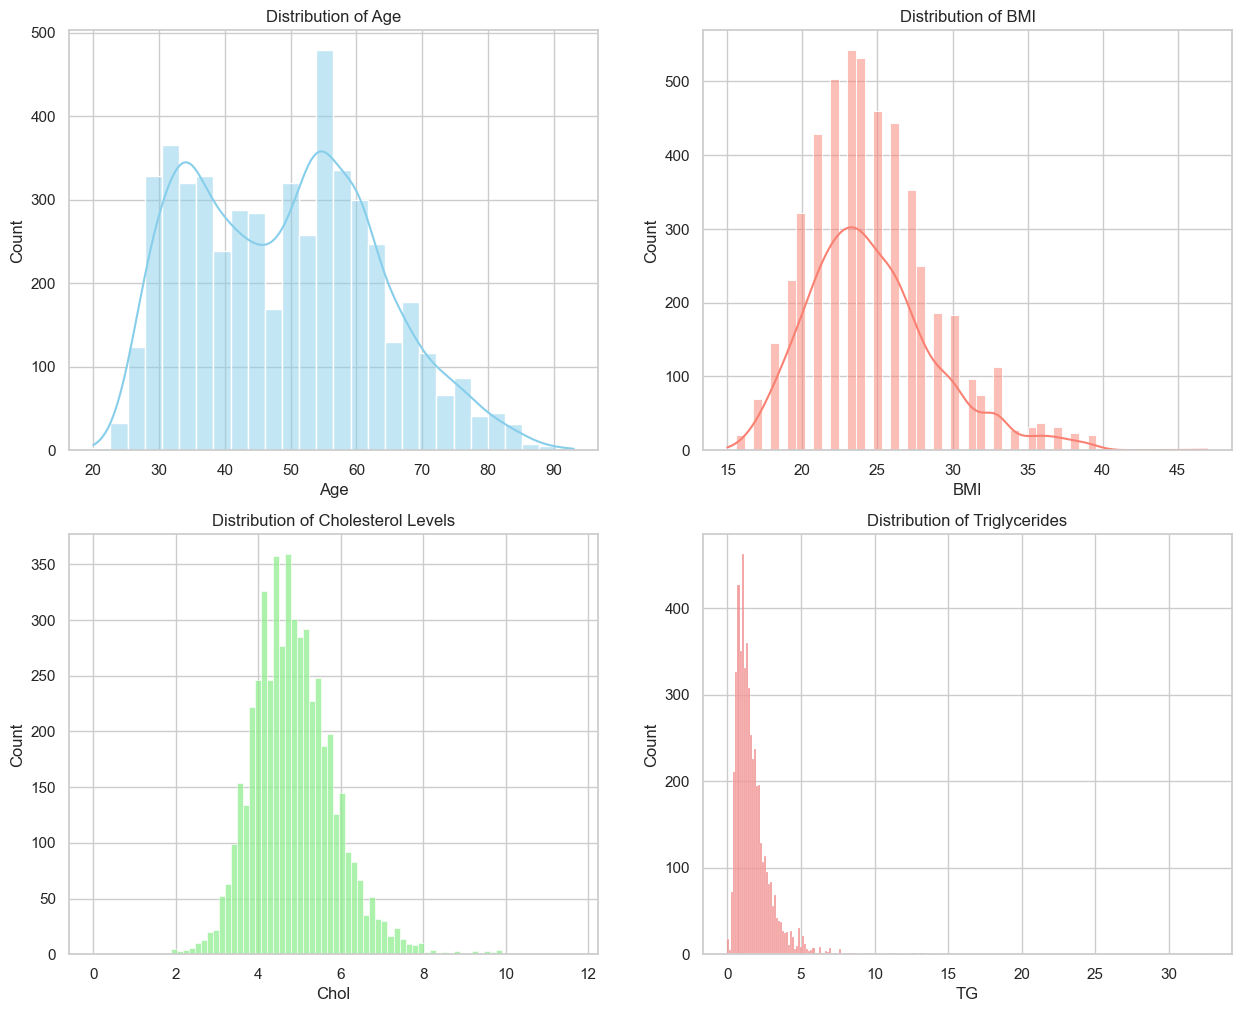

Vision API response time: 26.012974739074707
**Visual Analyst Figure Description**:
Based on the histograms provided in the figure, we can infer the following
insights:

1. **Distribution of Age**: The histogram for 'Age' reveals a bimodal
distribution. There are two peaks where the ages seem to cluster, suggesting
that there are two age groups that are more prevalent in the dataset than
others. The distribution also shows that the dataset includes individuals across
a wide range of ages, from young to old.

2. **Distribution of BMI**: The histogram for 'BMI' appears to be roughly
normally distributed with the peak around the 30 mark, which suggests a common
range of BMI values among the individuals in the dataset. However, the
distribution is slightly right-skewed, indicating there are more individuals
with higher BMI values than those with low BMI values.

3. **Distribution of Cholesterol Levels**: The histogram for 'Chol' (Cholesterol
Levels) does not have the kernel density estimat

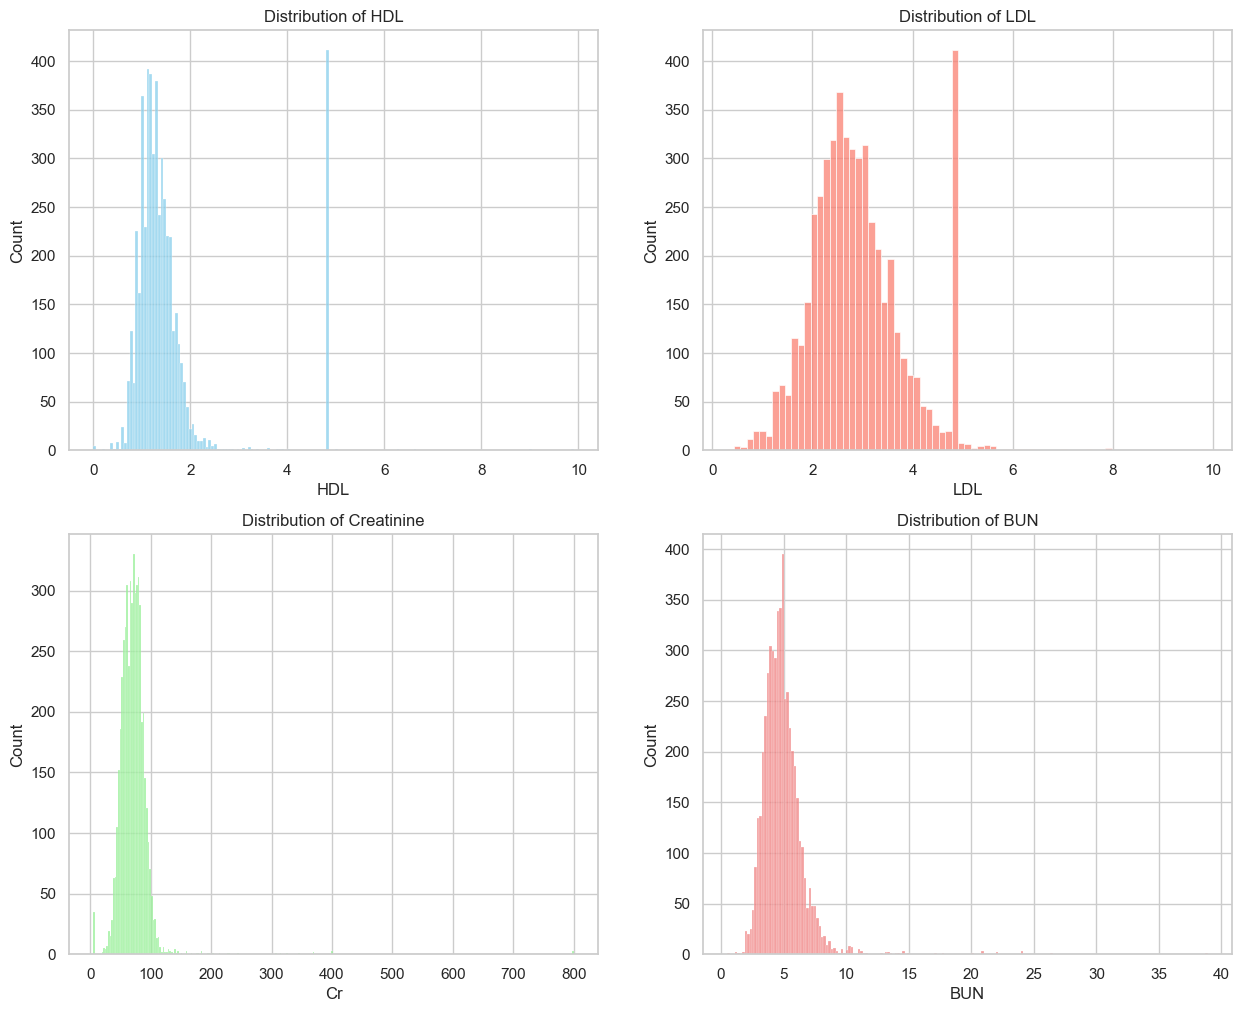

Vision API response time: 13.950102090835571
**Visual Analyst Figure Description**:
The figure presents a matrix of histograms with each plot representing the
distribution of a different biomedical variable, specifically HDL, LDL,
Creatinine (labelled as Cr), and BUN, related to diabetes data.

The histograms are color-coded: HDL is in sky blue, LDL in salmon, Creatinine in
light green, and BUN in light coral. Each histogram shows the frequency (count)
of observations on the y-axis and the range of values for the respective
variable on the x-axis.

From the histograms we can extract several insights:

1. **Distribution of HDL (High-Density Lipoprotein):**
   - The HDL values are mostly concentrated below 2, indicating that most of the
dataset consists of lower HDL levels.
   - There are some outliers or less frequent higher values extending up to 10,
but these are not typical.

2. **Distribution of LDL (Low-Density Lipoprotein):**
   - LDL levels show a distribution with a clear mode a

/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_1855/4021465944.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='BMI', data=diabetes_data, palette='pastel', ax=axes[0, 0])
/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_1855/4021465944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='Chol', data=diabetes_data, palette='pastel', ax=axes[0, 1])
/var/folders/zc/krgdt7x11zvc_h0tv7k3mfdh0000gq/T/ipykernel_1855/4021465944.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnos

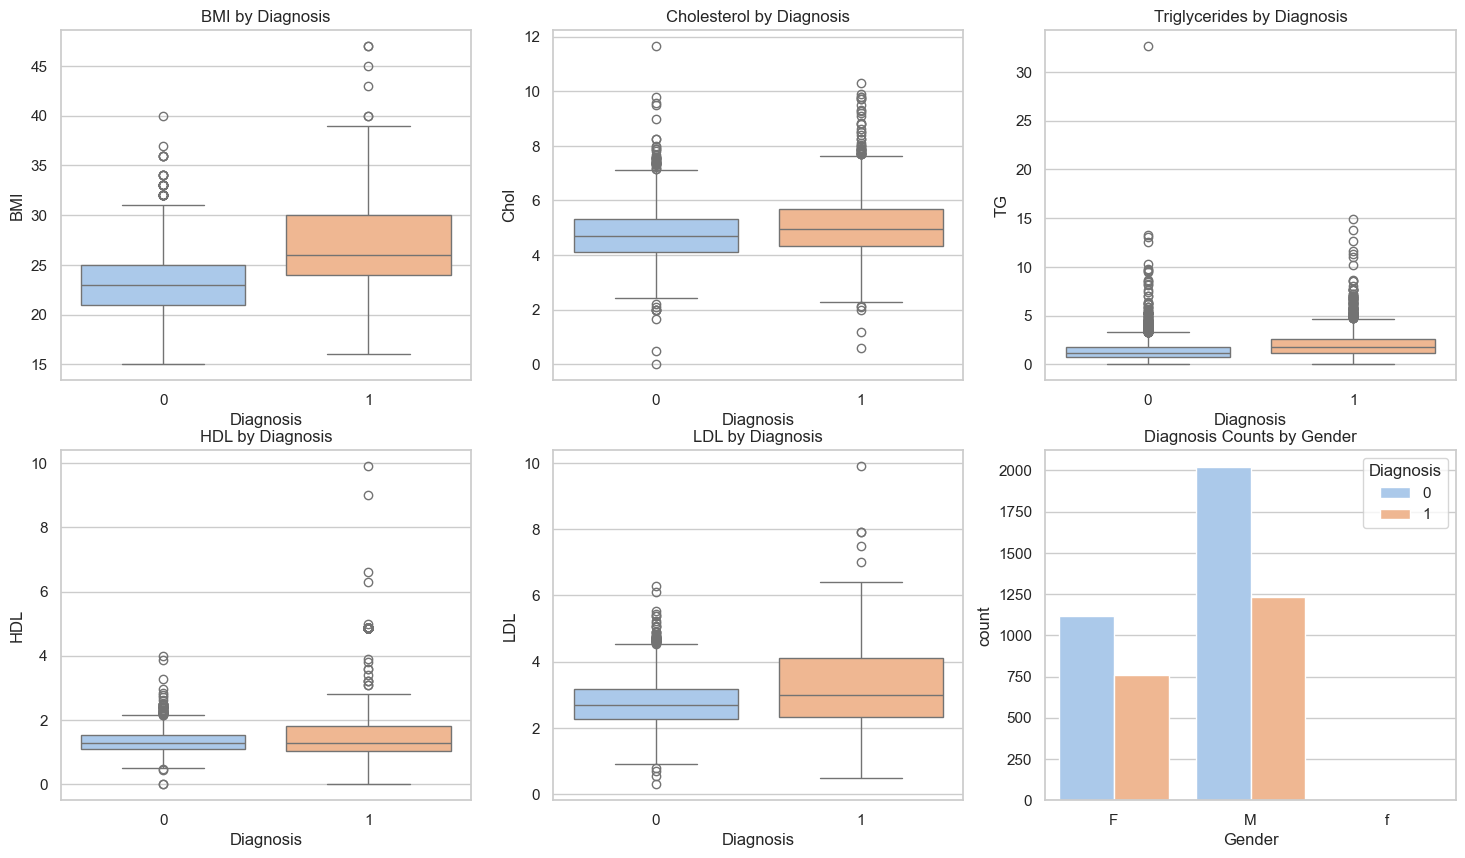

Vision API response time: 31.09137988090515
**Visual Analyst Figure Description**:
The figure is a collection of five boxplots and one bar chart, each providing
different insights into the data:

1. **BMI by Diagnosis**: The boxplot shows two groups based on diagnosis (0 and
1). The median BMI for the group labeled '1' is higher than for the group
labeled '0'. Both groups have some outliers, with the group labeled '1' having
more extreme outliers. This suggests that individuals with diagnosis '1' tend to
have a higher BMI.

2. **Cholesterol by Diagnosis**: The cholesterol boxplot also shows two groups.
The median cholesterol level is slightly higher in the group labeled '1', and
there is a larger spread (interquartile range) compared to the group labeled
'0'. Both groups have a number of outliers, indicating some individuals have
unusually high or low cholesterol levels.

3. **Triglycerides by Diagnosis**: This boxplot indicates a substantial
difference between the two groups. The grou

ValueError: could not convert string to float: 'F'

Python Code executed:
```python
# Correlation Matrix
matrix = diabetes_data.corr()
matrix
```
Execution error: ValueError could not convert string to float: 'F'
Python Code executed:
```python
# Remove non-numeric columns
numeric_data = diabetes_data.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix for numeric data
correlation_matrix = numeric_data.corr()
correlation_matrix
```
Execution Succeed:


,Unnamed: 0,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
Unnamed: 0,1.000000,0.227085,-0.195616,0.057016,-0.043291,0.370490,0.295342,0.004935,0.026759,0.284781
Age,0.227085,1.000000,0.277253,0.205584,0.184110,0.170291,0.224247,0.018641,0.208454,0.524570
BMI,-0.195616,0.277253,1.000000,0.122678,0.335229,-0.040569,0.034302,0.064428,0.105718,0.427543
Chol,0.057016,0.205584,0.122678,1.000000,0.334218,0.101136,0.584852,-0.014875,0.069939,0.131169
TG,-0.043291,0.184110,0.335229,0.334218,1.000000,-0.003750,0.089182,0.057870,0.053870,0.241759
HDL,0.370490,0.170291,-0.040569,0.101136,-0.003750,1.000000,0.545143,-0.077070,0.016053,0.309579
LDL,0.295342,0.224247,0.034302,0.584852,0.089182,0.545143,1.000000,-0.015482,0.056640,0.230578
Cr,0.004935,0.018641,0.064428,-0.014875,0.057870,-0.077070,-0.015482,1.000000,0.489446,-0.037298
BUN,0.026759,0.208454,0.105718,0.069939,0.053870,0.016053,0.056640,0.489446,1.000000,0.132749
Diagnosis,0.284781,0.524570,0.427543,0.131169,0.241759,0.309579,0.230578,-0.037298,0.132749,1.000000


The correlation matrix for the numeric variables shows the pairwise correlations
between them. Here are a few observations:

1. **Age and Diagnosis (0.52)**: There is a moderate positive correlation
between age and diagnosis. This suggests that as age increases, the likelihood
of a positive diabetes diagnosis also increases.

2. **BMI and Diagnosis (0.43)**: The BMI of individuals also shows a moderate
positive correlation with the diagnosis of diabetes. This indicates that higher
BMI values are associated with a higher likelihood of a positive diagnosis.

3. **TG and Diagnosis (0.24)**: Triglycerides (TG) show a moderate positive
correlation with the diagnosis. Higher triglyceride levels are associated with a
higher likelihood of a positive diagnosis of diabetes.

4. **HDL and Diagnosis (0.31)**: The level of High-Density Lipoprotein (HDL)
cholesterol also shows a moderate positive correlation with the diagnosis.
Higher HDL levels are associated with a higher likelihood of a positive


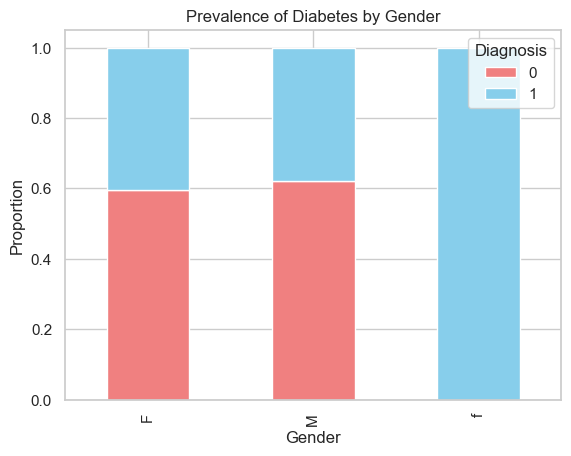

Vision API response time: 22.119338035583496
**Visual Analyst Figure Description**:
The figure is a stacked bar chart showing the prevalence of diabetes by gender,
based on an analysis of some dataset. There are two bars, each representing a
different gender. The red portion of each bar indicates the proportion of
individuals without diabetes (denoted by "0"), while the blue portion indicates
the proportion of individuals with diabetes (denoted by "1").

From this chart, we can see that for both genders, the proportion of individuals
without diabetes is roughly the same as the proportion of individuals with
diabetes. However, it appears that the gender represented by the bar on the left
has a slightly higher proportion of individuals diagnosed with diabetes compared
to the gender represented by the bar on the right.

One important thing to note is that the gender categories are not labeled on the
x-axis, so we cannot definitively say which bar corresponds to which gender.
However, base

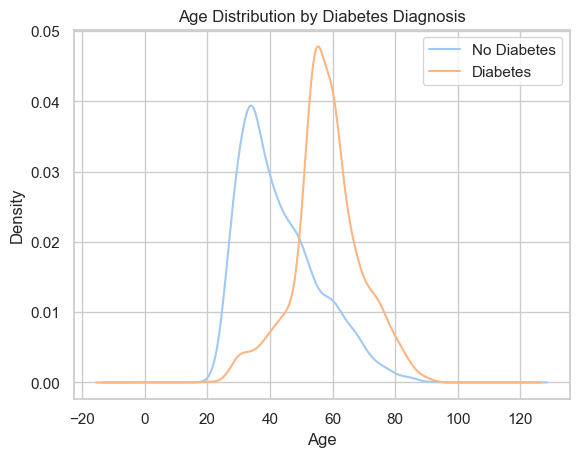

Vision API response time: 17.088204860687256
**Visual Analyst Figure Description**:
The figure is a Kernel Density Estimate (KDE) plot that shows the age
distribution of two groups: patients diagnosed with diabetes and those without.
The x-axis represents the age of patients, while the y-axis represents the
density, which indicates the probability of ages within each group.

Observations from the plot include:

1. The group of patients without diabetes (shown in blue) appears to have a peak
density at a younger age compared to the group with diabetes (shown in orange).
2. The peak density of the non-diabetic group suggests that the largest
proportion of this group is in the younger age bracket.
3. The diabetic group's age distribution is shifted towards an older population,
indicating a higher prevalence or diagnosis of diabetes in older age.
4. Both distributions seem roughly bell-shaped but the diabetic group has a more
pronounced peak and a narrower spread compared to the non-diabet

BMI     0.427543
Chol    0.131169
TG      0.241759
HDL     0.309579
LDL     0.230578
Cr     -0.037298
BUN     0.132749
Name: Diagnosis, dtype: float64

Python Code executed:
```python
# Machine Learning Model Development and Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = diabetes_data.drop(['Diagnosis', 'Gender'], axis=1)
y = diabetes_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model and get feature importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
```
Execution Succeed:
Python Code executed:
```python
# Display Feature Importances
feature_importance_dict = dict(zip(X.columns, feature_importances))
feature_importance_dict
```
Execution Succeed:


{'Unnamed: 0': 0.6353037081788347,
 'Age': 0.1707430319833719,
 'BMI': 0.07994368462857175,
 'Chol': 0.007659340191825718,
 'TG': 0.013222134116359526,
 'HDL': 0.03760387387640155,
 'LDL': 0.03500909191556721,
 'Cr': 0.014603568254710375,
 'BUN': 0.005911566854357294}

### Association of Risk Factors with Diagnosis
- The correlation between the risk factors (BMI, Cholesterol, Triglycerides,
HDL, LDL, Creatinine, BUN) and the diagnosis of diabetes is as follows:
  - BMI: 0.43
  - Cholesterol: 0.13
  - Triglycerides: 0.24
  - HDL: 0.31
  - LDL: 0.23
  - Creatinine: -0.04
  - BUN: 0.13

The strongest positive correlations are observed for BMI, HDL, and
Triglycerides, indicating that these factors are more strongly associated with
the diagnosis of diabetes. Creatinine shows a weak negative correlation,
suggesting a slight negative association with the diagnosis.

### Feature Importance for Predicting Diabetes
The feature importances obtained from training a Random Forest model are as
follows:
- Unnamed: 0: 0.64
- Age: 0.17
- BMI: 0.08
- Cholesterol: 0.01
- Triglycerides: 0.01
- HDL: 0.04
- LDL: 0.04
- Creatinine: 0.01
- BUN: 0.01

The feature importances indicate that the "Unnamed: 0" feature has the highest
importance, followed by "Age," "BMI," "HDL," "

/Users/binxuwang/miniforge3/envs/torch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
0    2789
2    1927
1     416
Name: count, dtype: int64

The KMeans clustering analysis has resulted in the identification of three
distinct clusters based on the biochemical markers (BMI, Cholesterol,
Triglycerides, HDL, LDL) in the dataset:
- Cluster 0: 2789 individuals
- Cluster 1: 1927 individuals
- Cluster 2: 416 individuals

These distinct clusters indicate that there are groups of individuals with
different profiles of biochemical markers, which might have implications for the
prevalence and diagnosis of diabetes.

With the completion of this analysis, we have answered several of the research
questions and obtained valuable insights from the dataset. We have explored the
distribution of risk factors, the prevalence of diabetes by gender, and age
distribution among patients diagnosed with diabetes. We have also identified key
risk factors associated with the diagnosis of diabetes and identified distinct
groups of individuals based on their biochemical markers.

If there are further questions or if there are additional analyses or
visua

In [9]:
# read the objetive from the markdown file
with open(f"{result_dir}/analysis_questions.md", "r") as file:
    supervisor_objective = file.read()

cache_arr = []
messages = []
datasci_task_objective = """Perform explorative data analysis of this dataset.
A list of potential questions that could be answered by analyzing this dataset is provided below.
These questions are organized by the type of analysis that would be required to answer them.
Please write code to answer these questions, and organize the results in the end.
"""
#Let's answer them by code one by one and form a final report. 
messages, nbcells, cache = tool_chat_loop_2nb_with_vision(
                f"""Here is a dataset, that can be loaded from {csvpath}.
                the dataset description {table_descriptions}. 
                and the column desctiption {column_descriptions}.\n
                Our overall objective is to {datasci_task_objective}, \n
                the specific questions are listed as follows, 
                {supervisor_objective}""", enable_vision=True, vision_token_count=1024,
                MAX_ROUND=15, nbcells=nbcells, model_name='gpt-3.5-turbo-1106',
                chat_history=messages, 
                )
cache_arr = cache_arr + cache
pkl.dump((messages, nbcells, cache_arr), open(f"{result_dir}/datasci_messages.pkl", "wb"))

In [10]:
save_cells_to_nb(nbcells, f"{result_dir}/Diabetes_diagonsis.ipynb", 
                 save_html=True, save_pdf=True);

Notebook saved to /Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports/Diabetes/Diabetes_diagonsis.ipynb
HTML report saved to /Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports/Diabetes/Diabetes_diagonsis.html
PDF report saved to /Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports/Diabetes/Diabetes_diagonsis.pdf
